In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils

In [41]:
from keras.datasets import mnist

In [42]:
data=mnist.load_data()

In [43]:
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [46]:
type(data)

tuple

In [47]:
len(data)

2

In [48]:
(X_train,y_train),(X_test,y_test)=data

In [49]:
type(X_train)

numpy.ndarray

In [50]:
X_train.shape

(60000, 28, 28)

In [51]:
X_test.shape

(10000, 28, 28)

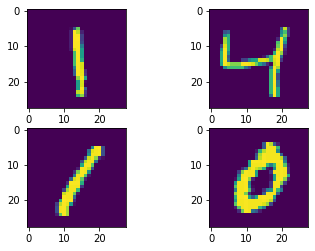

In [64]:
plt.subplot(221)
plt.imshow(X_train[8])
plt.subplot(223)
plt.imshow(X_train[3])
plt.subplot(222)
plt.imshow(X_train[2])
plt.subplot(224)
plt.imshow(X_train[37])

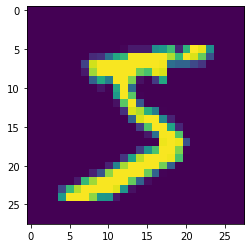

In [65]:
plt.imshow(X_train[0])

In [74]:
X_train.shape

(60000, 28, 28)

In [69]:
X_test.shape

(10000, 28, 28)

In [75]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [76]:
X_test.shape

(10000, 784)

In [77]:
X_train.shape

(60000, 784)

In [82]:
type(X_train[0][0])

numpy.uint8

In [83]:
X_train=X_train/255
X_test=X_test/255

In [87]:
X_train.shape

(60000, 784)

In [97]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [94]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [95]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [98]:
y_test.shape

(10000, 10)

In [100]:
y_train[8]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [134]:
from keras.models import Sequential
from keras.layers import Dense


In [135]:
model=Sequential()

In [136]:
model.add(Dense(64,input_dim=28*28,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_31 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_32 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_33 (Dense)             (None, 10)                2570      
Total params: 94,154
Trainable params: 94,154
Non-trainable params: 0
_________________________________________________________________


In [137]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_31 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_32 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_33 (Dense)             (None, 10)                2570      
Total params: 94,154
Trainable params: 94,154
Non-trainable params: 0
_________________________________________________________________


In [138]:
model.fit(X_train,y_train,epochs=10,batch_size=100)

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.5908 - accuracy: 0.8214
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1279 - accuracy: 0.9612
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0869 - accuracy: 0.9726
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0687 - accuracy: 0.9777
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0551 - accuracy: 0.9824
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0443 - accuracy: 0.9864
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0389 - accuracy: 0.9874
Epoch 8/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0324 - accuracy: 0.9892
Epoch 9/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0295 - accuracy: 0.9905
Epoch 10/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0222 - accuracy: 0.9926

In [139]:
scores =model.evaluate(X_test,y_test)
print(scores)

313/313 [==============================] - 1s 1ms/step - loss: 0.0983 - accuracy: 0.9742
[0.09830504655838013, 0.9742000102996826]
